In [1]:
# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
#범주형 데이터를 쉽게 수치형 데이터
from sklearn.preprocessing import LabelEncoder
#데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv('../input/titanic/train.csv')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train['Age'] = train['Age'].fillna(train['Age'].median()) # median 중앙값
train['Embarked'] = train['Embarked'].fillna('S') # 결측치 채우기
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bin, labels=group_names)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,MiddleAged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,YoungAdult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,YoungAdult


In [6]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
train['Title'] = train['Title'].replace(['Jonkheer', 'Master'], 'Master')
train['Title'] = train['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty')
train['Title'] = train['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train['Title'] = train['Title'].replace(['Mlle', 'Miss'], 'Miss')
train['Title'] = train['Title'].replace(['Mr'], 'Mr')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,MiddleAged,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,YoungAdult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,YoungAdult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,YoungAdult,Mr


In [7]:
train['Sex'] = train['Sex'].astype(str) # dtype 변경 LabelEncoder로 정수형 타입으로 바로 캐스팅이 불가능하기 때문에 우선 "String"타입으로 전환
label = LabelEncoder() # LabelEncoder객체를 label 인스턴스로 생성하여 특정 컬럼의 타입을 정수형으로 변환
for col in ['Sex', 'Embarked', 'Title', 'AgeGroup']:
    train[col] = label.fit_transform(train[col])
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,4,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,3,3


/tmp/ipykernel_21/2927643423.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, linewidths=2)


<Axes: >

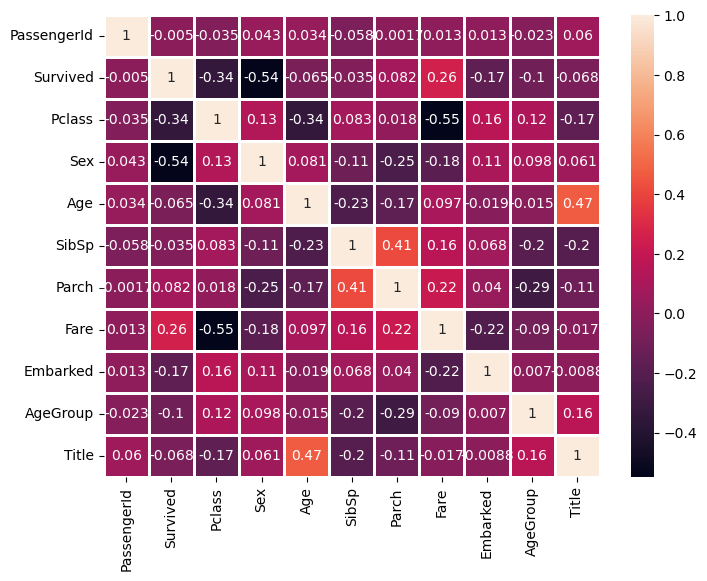

In [8]:
plt.subplots(figsize=(8,6))
sns.heatmap(train.corr(), annot=True, linewidths=2)

<Axes: xlabel='SibSp', ylabel='Survived'>

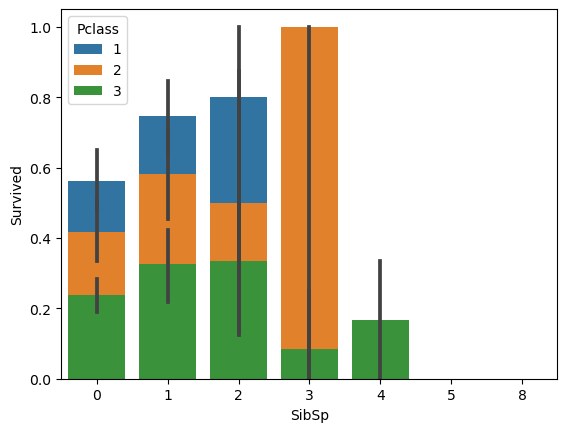

In [9]:
sns.barplot(x='SibSp', y='Survived', hue='Pclass', data=train, dodge=False)

<Axes: xlabel='Parch', ylabel='Survived'>

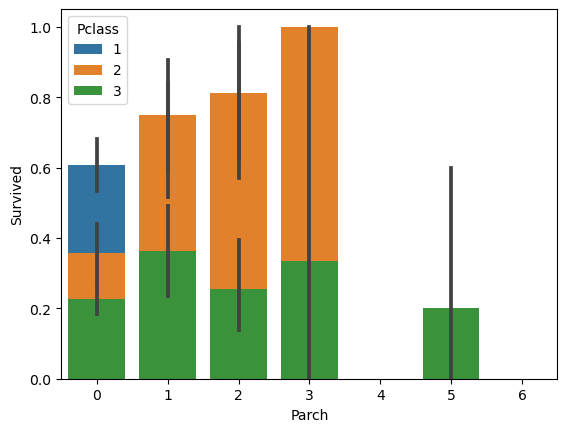

In [10]:
sns.barplot(x='Parch', y='Survived', hue='Pclass', data=train, dodge=False)

In [11]:
train = train.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin'], axis=1)
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,AgeGroup,Title
0,0,3,1,22.0,1,7.2500,2,4,3
1,1,1,0,38.0,1,71.2833,0,1,4
2,1,3,0,26.0,0,7.9250,2,3,2
3,1,1,0,35.0,1,53.1000,2,3,4
4,0,3,1,35.0,0,8.0500,2,3,3


In [12]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'AgeGroup', 'Title']]
Y_train = train['Survived']    
X_train.head(5)

,Pclass,Sex,Age,SibSp,Fare,Embarked,AgeGroup,Title
0,3,1,22.0,1,7.2500,2,4,3
1,1,0,38.0,1,71.2833,0,1,4
2,3,0,26.0,0,7.9250,2,3,2
3,1,0,35.0,1,53.1000,2,3,4
4,3,1,35.0,0,8.0500,2,3,3


In [13]:
lr = LogisticRegression(max_iter = 5000)

lr.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

In [14]:
test = pd.read_csv('../input/titanic/test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [17]:
test['AgeGroup'] = pd.cut(test['Age'], bins=bin, labels=group_names)
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,YoungAdult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,MiddleAged
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,YoungAdult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Youth


In [18]:
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['Title'] = test['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
test['Title'] = test['Title'].replace(['Jonkheer', 'Master'], 'Master')
test['Title'] = test['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty')
test['Title'] = test['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
test['Title'] = test['Title'].replace(['Mlle', 'Miss'], 'Miss')
test['Title'] = test['Title'].replace(['Mr'], 'Mr')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,YoungAdult,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,MiddleAged,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,YoungAdult,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Youth,Mrs


In [19]:
test['Sex'] = test['Sex'].astype(str) 
for col in ['Sex', 'Embarked', 'Title', 'AgeGroup']:
    test[col] = label.fit_transform(test[col])
test.head(5)   

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,3,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,1,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,2,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,3,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,4,3


In [20]:
test = test.drop(['PassengerId', 'Name', 'Ticket','Parch', 'Cabin'], axis=1)
test.head(5)

,Pclass,Sex,Age,SibSp,Fare,Embarked,AgeGroup,Title
0,3,1,34.5,0,7.8292,1,3,2
1,3,0,47.0,1,7.0000,2,1,3
2,2,1,62.0,0,9.6875,1,2,2
3,3,1,27.0,0,8.6625,2,3,2
4,3,0,22.0,1,12.2875,2,4,3


In [21]:
pred = lr.predict(test)

In [22]:
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')
gender_submission['Survived'].head(5)

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [23]:
gender_submission['Survived'] = pred
gender_submission['Survived'].head(5)

0    0
1    0
2    0
3    0
4    1
Name: Survived, dtype: int64

In [24]:
gender_submission.to_csv('./titanic_submission2.csv', index=False)